In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print(type(iris.data), type(iris.target), iris.data.shape)

indexs = np.random.randint(iris.data.shape[0], size=10)
irisDf = pd.DataFrame(iris.data[indexs], columns=['sepal-l', 'sepal-w', 'petal-l', 'petal-w'])
irisDf = pd.concat([irisDf, pd.DataFrame(iris.target[indexs], columns=['target'])], axis=1)
irisDf

<class 'numpy.ndarray'> <class 'numpy.ndarray'> (150, 4)


,sepal-l,sepal-w,petal-l,petal-w,target
0,5.5,2.6,4.4,1.2,1
1,6.0,3.0,4.8,1.8,2
2,4.4,3.2,1.3,0.2,0
3,5.1,3.5,1.4,0.2,0
4,6.0,3.0,4.8,1.8,2
5,4.6,3.2,1.4,0.2,0
6,6.3,2.5,4.9,1.5,1
7,5.5,4.2,1.4,0.2,0
8,5.0,3.4,1.5,0.2,0
9,6.3,3.3,6.0,2.5,2


In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

tree.export_graphviz(clf, 'tree.dot', rounded = True, 
                feature_names = ['sepal-l', 'sepal-w', 'petal-l', 'petal-w'], 
                class_names = ['Setosa', 'Versicolour', 'Virginica'], filled = True)

In [5]:
from subprocess import call
# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=400']);

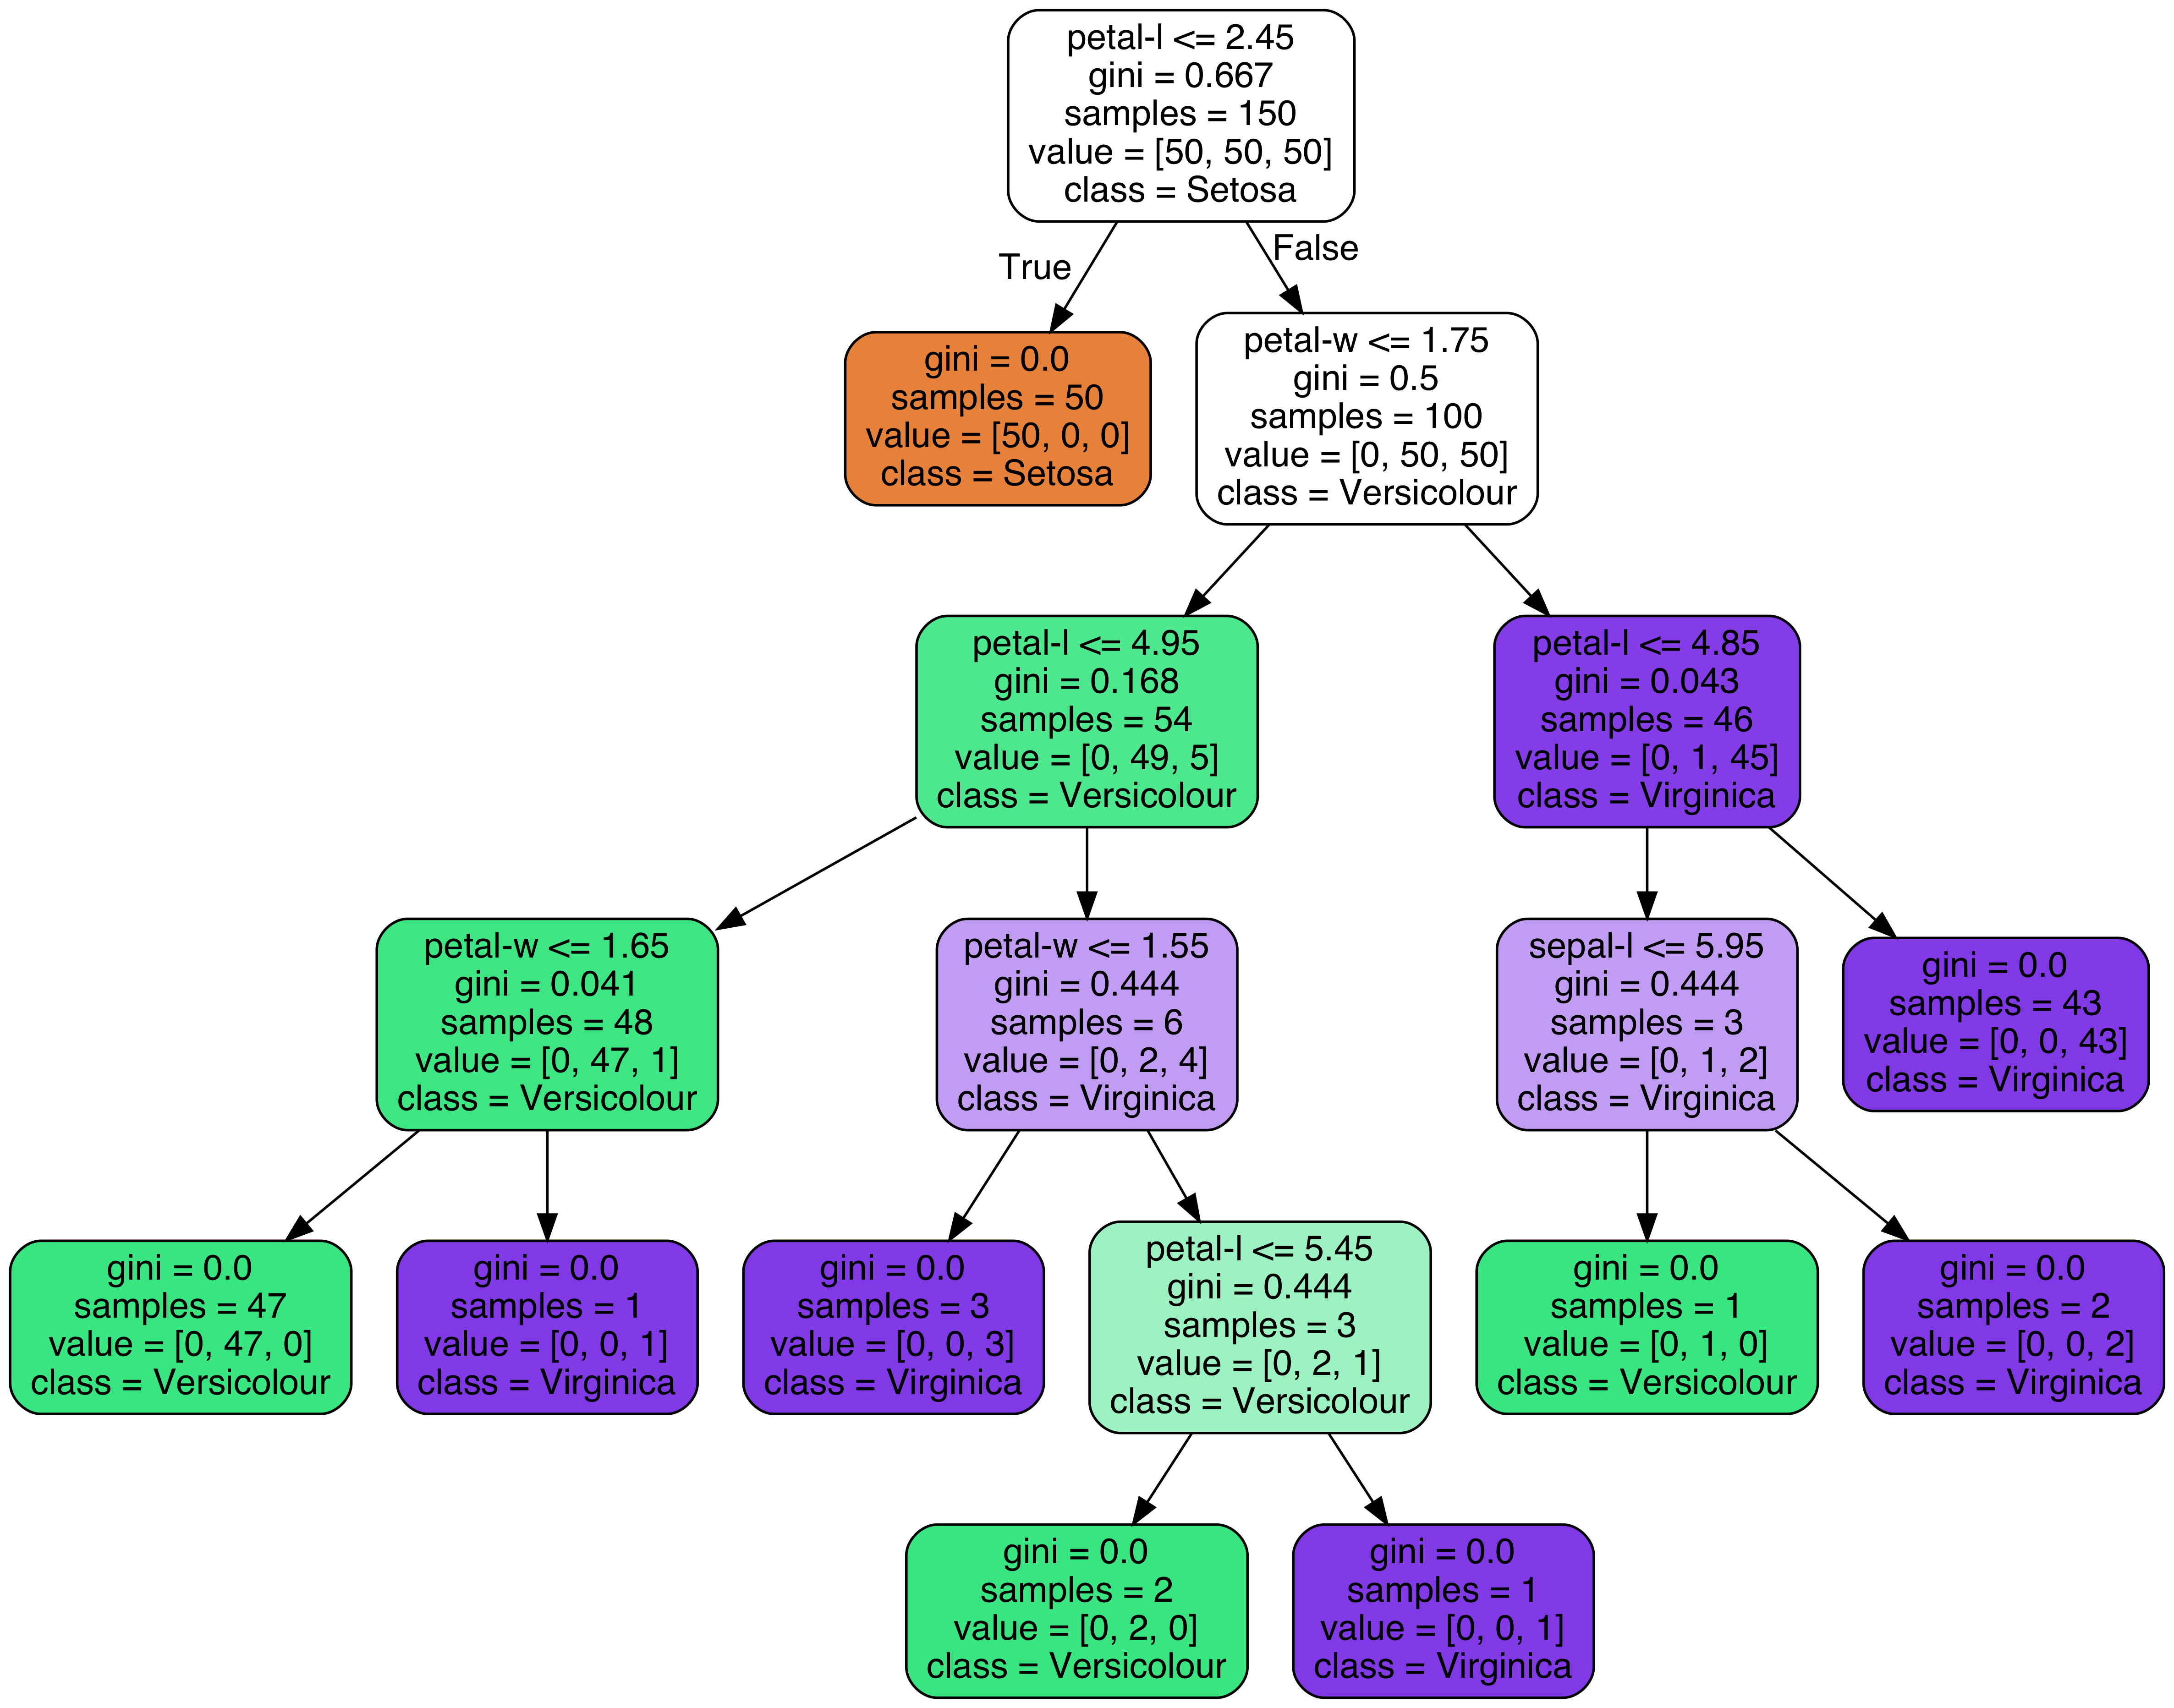

In [6]:
from IPython.display import Image
Image('tree.png')